In [1]:
import matplotlib.pyplot as plt
import numpy as np
import requests


In [11]:
# need to set a custom header, or else the api rejects it (see chatgpt convo)
headers = {
    "User-Agent": "QP_to_TL-regression-project"
}
# create two lists for np.array()
tl_list = []
qp_list = []
# starting from 
for i in range(25000, 0, -500):
    request_url = f"https://ch.tetr.io/api/users/by/league?limit=1&after={i}:0:0"
    # print(request_url)
    response = requests.get(request_url, headers=headers)
    user_id = response.json()['data']['entries'][0]['_id']
    # print(user_id)  # correct
    qp_info_url = f"https://ch.tetr.io/api/users/{user_id}/summaries/zenith"
    tl_info_url = f"https://ch.tetr.io/api/users/{user_id}/summaries/league"
    qp_response = requests.get(qp_info_url, headers=headers)
    tl_response = requests.get(tl_info_url, headers=headers)
    # TODO: if unsuccessful, skip user
    if qp_response.json()['success'] == False:
        continue
    if tl_response.json()['success'] == False:
        continue
    
    # retrieve relevant stats from qp and tl respectively
    # qp_vs = 0
    # tl_vs = 0

    # more failure points to check for qp?
    # this guy is causing some problems as unranked: 687ef53580151ad0b6efddfd/floorrotting
    print(type(qp_response.json()['data']['record']))
    if qp_response.json()['data']['record'] is None:
        continue
    #['results']['aggregatestats']['vsscore']))
    
    # print(type(tl_response.json()['data']['vs']))
    qp_vs = qp_response.json()['data']['record']['results']['aggregatestats']['vsscore']
    tl_vs = tl_response.json()['data']['vs']
    print(f"qp: {qp_vs}, tl: {tl_vs}")
    if qp_vs > 0 and tl_vs > 0:
        tl_list.append(tl_vs)
        qp_list.append(qp_vs)
print(len(tl_list))
print(len(qp_list))

# print(response.status_code)
# print(response.json()['data']['record']['results']['aggregatestats']['vsscore'])
# TODO: find a better way to handle json

# vs score is bad indicator, use sth else (maybe glicko? see what i can use to rev search an expected rating)

<class 'dict'>
qp: 116.99164345403901, tl: 373.64
<class 'dict'>
qp: 377.85987865640783, tl: 387.09
<class 'dict'>
qp: 190.8067315065176, tl: 299.1
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'dict'>
qp: 81.11779545895597, tl: 184.94
<class 'dict'>
qp: 155.85402939685758, tl: 178.6
<class 'NoneType'>
<class 'dict'>
qp: 80.06672226855713, tl: 167.24
<class 'NoneType'>
<class 'dict'>
qp: 59.507455185123135, tl: 136.65
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'dict'>
qp: 96.60070330276494, tl: 110.2
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'dict'>
qp: 75.04103806769328, tl: 56.48
<class 'dict'>
qp: 98.96368958152046, tl: 56.54
<class 'dict'>
qp: 68.45651217117513, tl: 52.85
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 

In [12]:
print(qp_list)
print(tl_list)

[116.99164345403901, 377.85987865640783, 190.8067315065176, 81.11779545895597, 155.85402939685758, 80.06672226855713, 59.507455185123135, 96.60070330276494, 75.04103806769328, 98.96368958152046, 68.45651217117513, 47.53254617014835, 51.9080350794027, 53.893829156561566]
[373.64, 387.09, 299.1, 184.94, 178.6, 167.24, 136.65, 110.2, 56.48, 56.54, 52.85, 32.92, 33.48, 14.43]


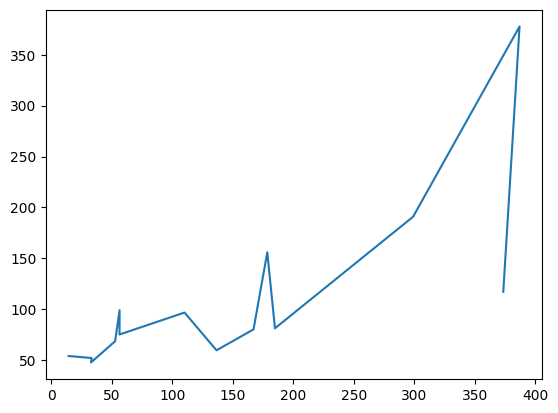

In [15]:
xpoints = np.array(tl_list)
ypoints = np.array(qp_list)

plt.plot(xpoints, ypoints)
plt.show()
# so vs score is a bad metric